# Table of Contents

* [Introduction](#Introduction)
* [Meta data](#Metadata)
* [Exploratory Data Analysis (EDA)](#Exploratory_Data_Analysis)
    * [Uni-variate analysis](#uni-variate)
    * [Multi-variate analysis](#multi-variate)
    * [Correlation map](#correlation_map)
* [Data cleaning](#data-cleaning)
    * [Missing values](#missing-values)
    * [Duplicates](#duplicates)

# Introduction

Vous êtes développeur dans une entreprise qui travaille dans le domaine de la FinTech. Votre client est une société d'investissement qui souhaite détecter les faillites d'entreprises, ce qui leur permet de mieux comprendre et gérer les risques.


Votre objectif est de créer un modèle de machine learning pour détecter la probabilité de faire faillite en utilisant les decision trees et les méthodes ensemblistes (bagging, boosting and stacking).


Pour cela, vous disposez d'un dataset avec 95 features (X1-X95) et un target. Les features représentent des indicateurs définis par les réglementations commerciaux de la Bourse. Votre target est appelé "Bankrupt ?", qui a la valeur 0 si l'entreprise n'a pas fait faillite, et la valeur 1 si l'entreprise a fait faillite.


# Import libraries

In [3]:
import os

# visualisation
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Exploration
from quickda.explore_categoric import *

# ignore warnings
import warnings
warnings.filterwarnings('ignore')




# Data Fetching

In [4]:
file_path= "../data/data_raw.csv" # Filepath of CSV file

In [5]:
df = pd.read_csv(file_path)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# Feature Selections

In [8]:
X = df.iloc[:, 1:]  # List of features which are required for model training
y = df['Bankrupt?']  # Target feature for prediction.

# Exploratory data analysis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [23]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [10]:
# check null values
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [11]:
# check duplicates instances
df.duplicated().sum()

0

## Multi-variate analysis

In [9]:
X.hist(figsize=(20,20), edgecolor='white')
plt.show()

In [36]:
# Plotting Boxplots
plt.figure(figsize = (20,20))
ax=sns.boxplot(data = X, orient="h")
ax.set_title('Bankruptcy Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

**Notes**

`data` : 6819 instances, 96 cols

`features` : 96 features, [93 float64], [3 int64]

`target` : Bankrupt?

`categorical features` : Liability-Assets Flag, Bankrupt? (target)

`Missing values` : No null/missing values

`Duplicates` : no duplicates

`Abnormal`: Net Income Flag : one only unique value?

## Uni-variate analysis

### Target's instances distribution

Bar Plot of Bankrupt?


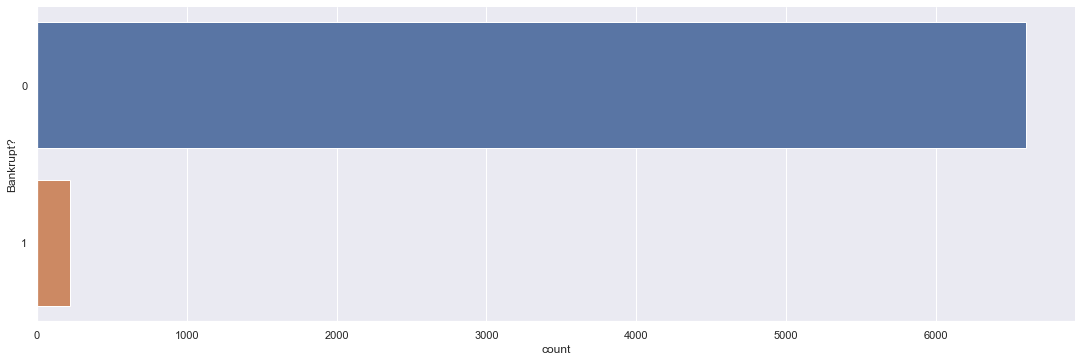

Summary of Bankrupt?


,count,relative_pct
0,6599,0.97
1,220,0.03


In [60]:
eda_cat(df, x='Bankrupt?')

In [20]:
print(y.value_counts())
print('-'* 30)
print('Financially stable: ', round(y.value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Financially unstable: ', round(y.value_counts()[1]/len(df) * 100,2), '% of the dataset')

0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


**Notes**

This dataset is oversampled w/ only 3% of positive class instances.
We might have to perform a SMOTE to overcome this problem.

## Correlation Map

### Feature correlation w/ themself

In [ ]:
corr = df.corr() # define correlation matrix
corr_df = corr.unstack().reset_index() # Unstack correlation matrix

# rename columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# sort by correlation
corr_df.sort_values(by="correlation", ascending=False, inplace=True)

# Remove self correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']]
corr_df

### Feature correlation w/ target

In [48]:
bankruptcy_corr = corr_df[corr_df['feature_1'] == 'Bankrupt?']
bankruptcy_corr

,feature_1,feature_2,correlation
37,Bankrupt?,Debt ratio %,0.250161
60,Bankrupt?,Current Liability to Assets,0.194494
40,Bankrupt?,Borrowing dependency,0.176543
84,Bankrupt?,Current Liability to Current Assets,0.171306
91,Bankrupt?,Liability to Equity,0.166812
...,...,...,...
1,Bankrupt?,ROA(C) before interest and depreciation befor...,-0.260807
3,Bankrupt?,ROA(B) before interest and depreciation after...,-0.273051
2,Bankrupt?,ROA(A) before interest and % after tax,-0.282941
86,Bankrupt?,Net Income to Total Assets,-0.315457


**Notes**

`Features correlation` : There are a lot of features which are self correlated or nearly self correlated.

`Target correlation` : there are only 2 feature w/ weak positive and negative correlation w/ the target, which are 'Debt ratio %' (0.25) and 'Net Income to Total Assets' (0.31)

`Abnormal` : Net Income Flag correlation score return a 'NaN' value.

----------------

# Data Cleaning

There are not either missing values or duplicates in this dataset.
We might have to drop irrelevant one only unique value 'Net Income Flag', and remove empty space in the beginning of columns names as well.

Outliers treatment will be performed on notebook_model w/ columnTransformer method.

In [64]:
# drop the space before title of columns
df.columns = [c.replace(" ","", 1) if c.startswith(' ') else c for c in df.columns]

In [65]:
# drop 'Net Income Flag' feature
df = df.drop('Net Income Flag', axis=1)

In [66]:
# export cleaned dataset
df_cleaned = df.to_csv('../data/data_cleaned.csv', index=False)

--------------------------------